207CT40373_HuynhAnhKiet

1.Viết chương trình xử lí điểm ảnh

1.1 Biến đổi cường độ ảnh

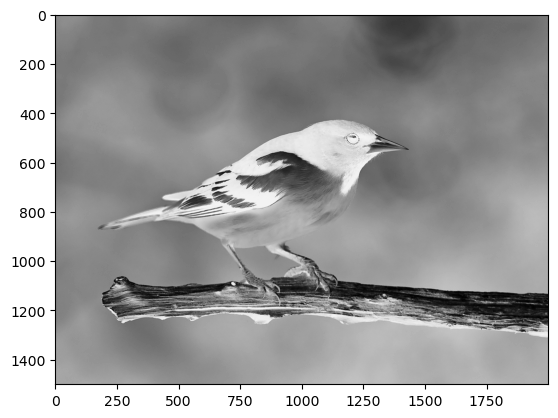

In [4]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img_original = Image.open('bird.png')
img = img_original.convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# inversion operation
im_2 = 255 - im_1

# convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)


img.show()
new_img.show()
plt.imshow(new_img, cmap='gray')
plt.show()

1.2 Thay đổi chất lượng ảnh với Power law

C:\Users\US\AppData\Local\Temp\ipykernel_11376\3472901008.py:27: RuntimeWarning: divide by zero encountered in log
  b3 = np.log(b3) * gamma


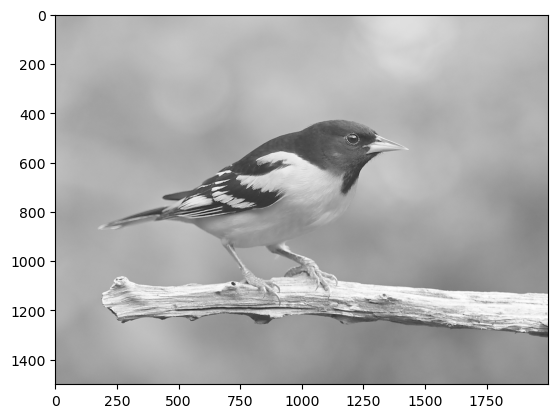

In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# init gamma
gamma = 0.5

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# b3 is normalized
b3 = b1 / b2

# gamma correction exponent is computed
b3 = np.log(b3) * gamma

# gamma correction is computed
c = np.exp(b3) * 255.0

# c1 is converted to type int
c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()


1.3 Thay đổi cường độ điểm ảnh với Log Transformation

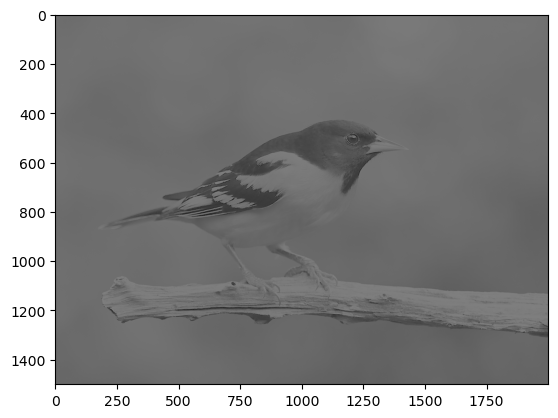

In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# performing the log transformation
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# c1 is converted to type int
c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()


1.4 Histogram equalization

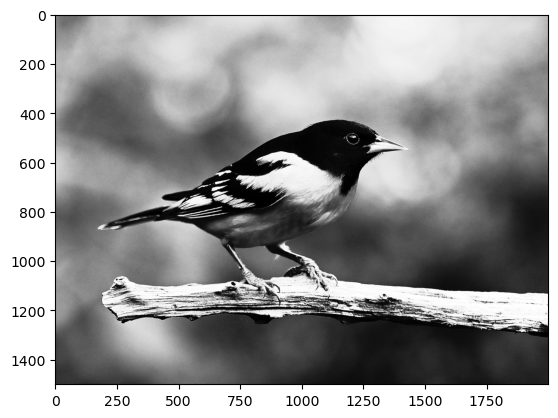

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# convert 2D ndarray from 1D array
im1 = im1.flatten()

# histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

# cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# histogram equalization is performed
num_cdf = (cdf_m - cdf_m.min()) * 255
den_cdf = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf / den_cdf

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[im1]

# using reshape command to make it into 2D
im3 = np.reshape(im2, img.size[::-1])

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()


1.5 Thay đổi ảnh với Contrast Stretching

255 0


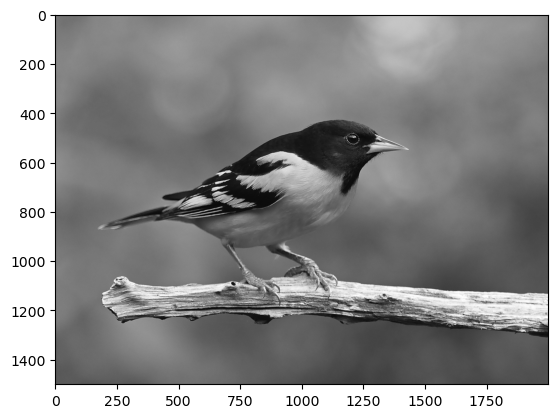

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# finding the maximum and minimum pixel values
a = im1.max()
b = im1.min()
print(a, b)

# converting im1 to float
c = im1.astype(float)

# contrast stretching transformation
im2 = 255 * (c - b) / (a - b)

# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()


1.6.1 Biến đổi ảnh fast fourier

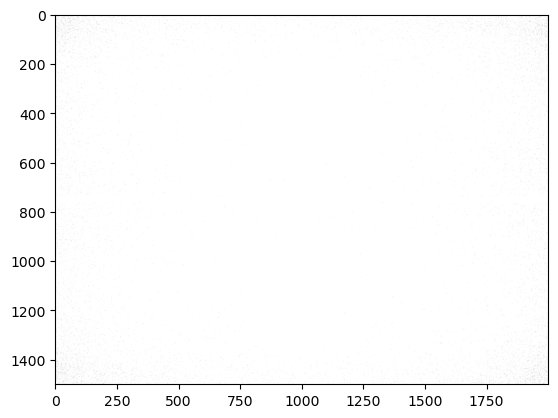

In [9]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

d = d.astype(float)

# im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2 Butterworth Lowpass filter

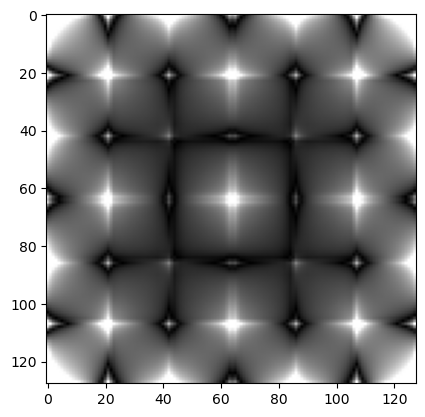

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('images.png').convert('L')

# convert image into ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

# d is defined and values in H are initialized to 1
center1 = M / 2
center2 = N / 2

# D0 is the cut-off radius
# n is the order of BLPF (Butterworth Lowpass Filter)
D0 = 50
n = 2 * 1

# defining the convolution function for BLPF
for i in range(0, M):
    for j in range(0, N):
        # Euclidean distance from origin is computed
        d1 = math.sqrt((i - center1)**2 + (j - center2)**2)
        if d1 == 0:
            H[i, j] = 1
        else:
            H[i, j] = 1 / (1 + (d1 / D0)**n)

# convolution is performed
e = d * H

# computing the magnitude of the inverse FFT
con = abs(scipy.fftpack.ifft2(e))

# im2 is converted from ndarray to image
im3 = Image.fromarray(con.astype(float))

img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.3 Butterworth highpass filter

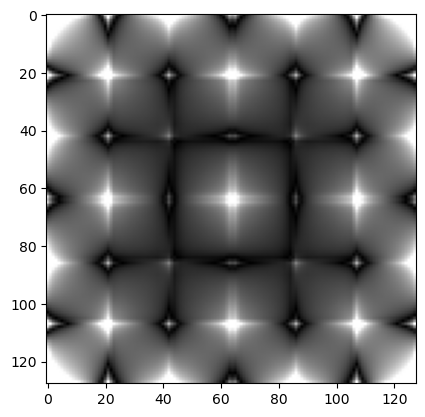

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('images.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))  # initialize H to all ones

center1 = M / 2
center2 = N / 2

# D0 is the cut-off radius
# n is the order of BLPF (Butterworth Lowpass Filter)
d0 = 50
n = 2 * 1

# d0_cut defines cut-off radius to eliminate high frequency
d0_cut = 100

# defining the convolution function for BLPF
for i in range(0, M):
    for j in range(0, N):
        # Euclidean distance from origin is computed
        d1 = math.sqrt((i - center1)**2 + (j - center2)**2)
        if d1 < d0_cut:
            H[i, j] = 1 / (1 + ((d1 / d0)**n))

# H is assigned to e
e = H * d

# converting H * d from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

# performing the convolution (inverse FFT)
con = H * d
f = abs(scipy.fftpack.ifft2(con))

# im2 is converted from ndarray to image
im3 = Image.fromarray(f.astype(float))

img.show()
im3.show()
plt.imshow(im3)
plt.show()


II. BÀI TẬP


In [1]:
pip install opencv-python numpy matplotlib


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


1.	Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
-	Image inverse transformation
-	Gamma-Correction
-	Log Transformation
-	Histogram equalization
-	Contrast Stretching

Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
def image_inverse(img):
    return 255 - img
def gamma_correction(img, gamma=2.2):
    norm_img = img / 255.0
    corrected = np.power(norm_img, gamma)
    return np.uint8(corrected * 255)
def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    return np.uint8(c * np.log(1 + img))
def histogram_equalization(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * (255 / (b - a))
    return np.uint8(stretched)
def apply_transformation1(key, img):
    if key == 'I':
        return image_inverse(img)
    elif key == 'G':
        return gamma_correction(img)
    elif key == 'L':
        return log_transform(img)
    elif key == 'H':
        return histogram_equalization(img)
    elif key == 'C':
        return contrast_stretching(img)
def main_transform1():
    keys = ['I', 'G', 'L', 'H', 'C']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        for key in keys:
            result = apply_transformation1(key, img)
            out_path = f'exercise/{key}_{file}'
            cv2.imwrite(out_path, result)
            cv2.imshow(f'{key}_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

2.	Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
-	East Fourier
-	Butterworth Lowpass Filter
-	Butterworth Highpass Filter

Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.

In [4]:
def fft_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)
    magnitude = 20 * np.log(np.abs(dft_shift))
    return np.uint8(np.clip(magnitude, 0, 255))

def butterworth_lowpass(img, D0=30, n=2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    M, N = gray.shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u - M//2, v - N//2, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0)**(2 * n))

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)
    result = dft_shift * H
    inv_dft = np.fft.ifft2(np.fft.ifftshift(result))
    return np.uint8(np.abs(inv_dft))

def butterworth_highpass(img, D0=30, n=2):
    return 255 - butterworth_lowpass(img, D0, n)

def apply_transformation2(key, img):
    if key == 'F':
        return fft_transform(img)
    elif key == 'L':
        return butterworth_lowpass(img)
    elif key == 'H':
        return butterworth_highpass(img)

def main_transform2():
    keys = ['F', 'L', 'H']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        for key in keys:
            result = apply_transformation2(key, img)
            out_path = f'exercise/{key}_freq_{file}'
            cv2.imwrite(out_path, result)
            cv2.imshow(f'{key}_freq_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

3.	Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.

In [6]:
import random
def swap_rgb(img):
    return img[:, :, [2, 1, 0]]
def main_task3():
    keys = ['I', 'G', 'L', 'H', 'C']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        img_swapped = swap_rgb(img)
        key = random.choice(keys)
        result = apply_transformation1(key, img_swapped)
        cv2.imwrite(f'exercise/task3_{key}_{file}', result)
        cv2.imshow(f'task3_{key}_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

4.	Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.

In [7]:
from scipy.ndimage import minimum_filter, maximum_filter
def main_task4():
    keys = ['F', 'L', 'H']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        img_swapped = swap_rgb(img)
        key = random.choice(keys)
        result = apply_transformation2(key, img_swapped)
        if key == 'L':
            result = minimum_filter(result, size=3)
        elif key == 'H':
            result = maximum_filter(result, size=3)
        cv2.imwrite(f'exercise/task4_{key}_{file}', result)
        cv2.imshow(f'task4_{key}_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()